In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

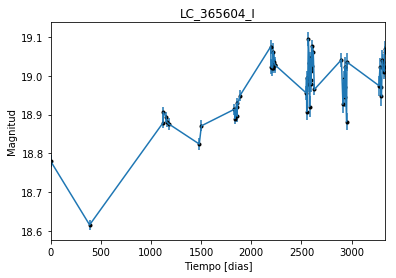

In [2]:
data = np.genfromtxt('LC_365604_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_365604_I')
plt.savefig("LC_365604_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

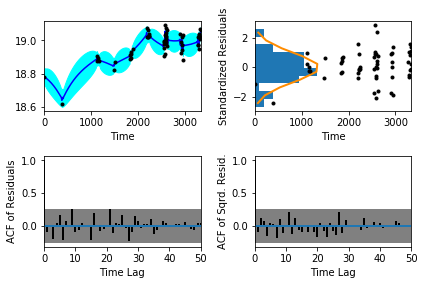

In [5]:
sample.assess_fit()

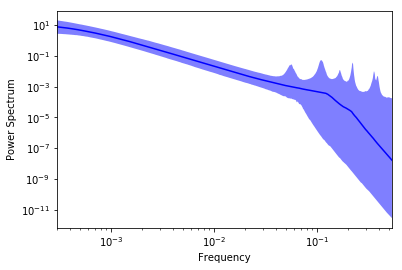

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

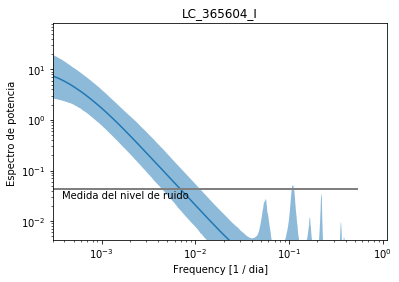

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_365604_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_365604_I')

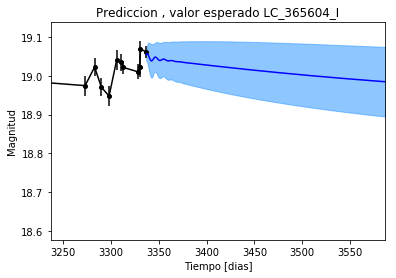

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_365604_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_365604_I')

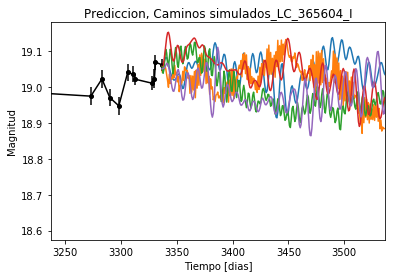

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_365604_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


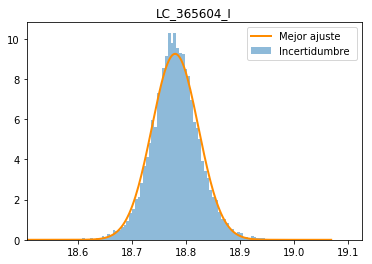

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_365604_I')
plt.savefig("Mejor_ajuste_LC_365604_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_365604_I')

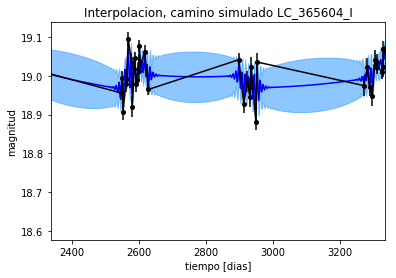

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_I')

Text(0.5,1,'Interpolacion, camino simulado LC_365604_I')

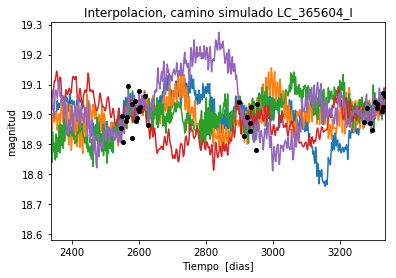

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 389.359637918
Median: 0.00516376310566
Standard deviation: 0.0611515682862
68% credibility interval: [ 0.00190669  0.0181126 ]
95% credibility interval: [ 0.00061054  0.13710323]
99% credibility interval: [  3.41401711e-04   4.60037728e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 215.299325413
Median: 0.00505130663522
Standard deviation: 0.0451843769658
68% credibility interval: [ 0.00183733  0.01708404]
95% credibility interval: [ 0.00054671  0.11624177]
99% credibility interval: [ 0.00033646  0.27959852]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 390.317629593
Median: 0.38369329708
Standard deviation: 0.2920198

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 230.469157288
Median: 114.551376834
Standard deviation: 2.61918152273
68% credibility interval: [ 111.49132298  116.61635268]
95% credibility interval: [ 107.9489193   117.85591548]
99% credibility interval: [ 105.706955    118.51752826]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 437.163527743
Median: 2.65271986821
Standard deviation: 1.91365862571
68% credibility interval: [ 0.93007998  5.23206268]
95% credibility interval: [ 0.20382419  6.60622745]
99% credibility interval: [ 0.04498807  7.91204163]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 90.8409027
Median: 1.25047624899
Standard deviation: 8.71742887144
68% credibility interval: [ 0.53358941  6.50899636]
95% credibility interval: [  0.13032161  33.321

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20010.3753357
Median: 6.2950427695e-41
Standard deviation: 1.75352188879e+39
68% credibility interval: [  5.58584415e-70   2.71792877e-18]
95% credibility interval: [  5.57740965e-111   4.85543862e+000]
99% credibility interval: [  4.18432717e-128   9.09724526e+000]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1229.91263798
Median: 18.8968894987
Standard deviation: 0.0589090377521
68% credibility interval: [ 18.83979538  18.95019116]
95% credibility interval: [ 18.77992968  19.01377341]
99% credibility interval: [ 18.73195322  19.06130825]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 73.8702875836
Median: 0.150830538876
Standard deviation: 0.220971316082
68% credibility interval: [ 0.1060791   0.38810541]
95% credibility interval: [ 0.05211351  0.89547667]
99% credibility interval: [ 0.          0.99307173]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 73.8702875836
Median: 0.150830538876
Standard deviation: 0.220971316082
68% credibility interval: [ 0.1060791   0.38810541]
95% credibility interval: [ 0.05211351  0.89547667]
99% credibility interval: [ 0.          0.99307173]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1398.08705564
Median: 0.0
Standard deviation: 0.000123638113665
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 230.469157288
Median: 114.551376834
Standard deviation: 2.61918152273
68% credibility interval: [ 111.49132298  116.61635268]
95% credibility interval: [ 107.9489193   117.85591548]
99% credibility interval: [ 105.706955    118.51752826]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 457.337202897
Median: 0.0158263793915
Standard deviation: 0.00826095677279
68% credibility interval: [ 0.01059915  0.02447569]
95% credibility interval: [ 0.00771971  0.03749083]
99% credibility interval: [ 0.00603169  0.05037815]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 377.38729671
Median: 1.28875587569
Standard deviation: 0.290464056319
68% credibility interval: [ 1.01642402  1.63113315]
95% credibility interval: [ 0.82291376  1.91763292]
99% credibility interval: [ 0.7393826   1.97749095]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 131.810635991
Median: 0.0198448350914
Standard deviation: 0.286694737204
68% credibility interval: [ 0.00458706  0.22669223]
95% credibility interval: [  1.40103012e-04   1.02605840e+00]
99% credibility interval: [  3.39547059e-06   1.49393288e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 389.359637918
Median: (-0.0324448804752-0.679926502191j)
Standard deviation: 1.44058842669
68% credibility interval: [-0.11380481-0.66203556j -0.01198006-3.8301009j ]
95% credibility interval: [-0.86144498-4.91421468j -0.00383613-4.91006035j]
99% credibility interval: [ -2.89050229e+00+0.j          -2.14509022e-03-0.02810767j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 215.299325413
Median: (-0.0317382956325+1.34488653219j)
Standard deviation: 1.41713272049
68% credibility interval: [-0.10734220+1.32825759j -0.01154426+3.30671235j]
95% credibility interval: [-0.73036856+1.01902309j -0.00343508+0.70179362j]
99% credibility interval: [-1.75676930+0.01304032j -0.00211403+5.63648772j]
Posterior summary for parameter a